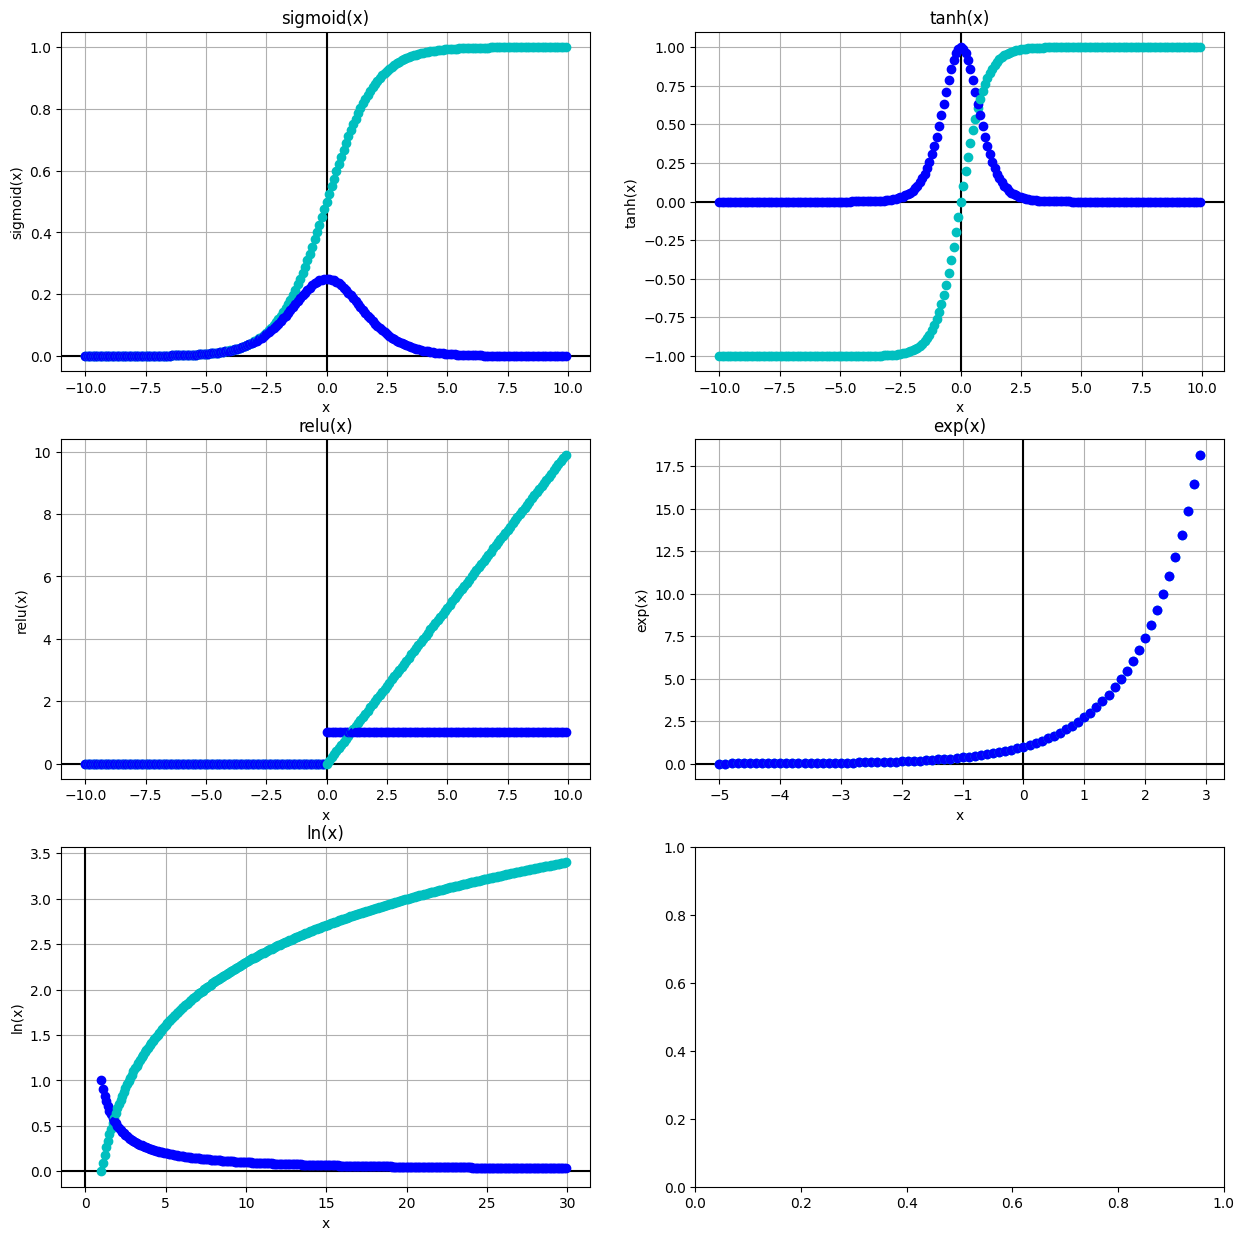

In [1]:
## Plots various functions used in neural networks along with their derivates
# Activation functions - sigmoid, tanh, relu
# Other functions - exp, ln

from matplotlib import pyplot as plt
import numpy as np

from value import Value

fig, ((sigmoid_plt, tanh_plt), (relu_plt, exp_plot), (ln_plot, _) ) = plt.subplots(3, 2, figsize=(15, 15))
plts = [sigmoid_plt, tanh_plt, relu_plt, exp_plot, ln_plot]
fn_names = ["sigmoid", "tanh", "relu", "exp", "ln"]
ranges = [None, None, None, (-5, 3), (1, 30)]
fn_definitions = [
    lambda v: v.sigmoid(),
    lambda v: v.tanh(),
    lambda v: v.relu(),
    lambda v: v.exp(),
    lambda v: v.ln(),
]

EPSILON = 0.00000001
for plt, fn_name, x_range, fn_definition in zip(plts, fn_names, ranges, fn_definitions):
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    y_axis_title = f"{fn_name}(x)"
    plt.set_title(y_axis_title)
    plt.set_xlabel("x")
    plt.set_ylabel(y_axis_title)
    plt.grid(True, which='both')
    x_range_start = x_range[0] if x_range else -10
    x_range_end = x_range[1] if x_range else 10
    for a in np.arange(x_range_start, x_range_end, 0.1):
        v = Value(a, label='val')
        s = fn_definition(v)  
        plt.plot(v.data, s.data, 'co')

        # calculate derivative
        v_with_epsilon = Value(a + EPSILON, label='v_with_epsilon')
        s_prime =fn_definition(v_with_epsilon)
        derivative = (s_prime.data - s.data) / EPSILON
        plt.plot(v.data, derivative, 'bo')